In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [208]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [209]:
df = pd.read_csv('Travel.csv')

In [210]:
df.shape

(4888, 20)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [212]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [213]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('--------------------------------')

CustomerID
[200000 200001 200002 ... 204885 204886 204887]
--------------------------------
ProdTaken
[1 0]
--------------------------------
Age
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
--------------------------------
TypeofContact
['Self Enquiry' 'Company Invited' nan]
--------------------------------
CityTier
[3 1 2]
--------------------------------
DurationOfPitch
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]
--------------------------------
Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
--------------------------------
Gender
['Female' 'Male' 'Fe Male']
--------------------------------
NumberOfPersonVisiting
[3 2 1 4 5]
--------------------------------
NumberOfFollowups
[ 3.  4.  2.  5

# Data Pre-Processing

In [214]:
# Membuang colom yang tidak digunakan
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Handling Missing Values

In [215]:
df_prep.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [216]:
na_columns = df_prep.columns[df_prep.isna().sum()>0]
na_columns

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
       'MonthlyIncome'],
      dtype='object')

In [217]:
df_is_na = df_prep[['ProdTaken','Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
                    'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
                    'MonthlyIncome']]

In [218]:
for i in na_columns:
    null_feat = df_is_na[df_is_na[i].isnull()]
    count_by_prodtaken = null_feat['ProdTaken'].value_counts()
    percentage_by_prodtaken = null_feat['ProdTaken'].value_counts(normalize=True) * 100
    print(f'Value Counts of ProdTaken for null values in {i}:\n{count_by_prodtaken}')
    print(f'Percentage of ProdTaken values for null values in {i}:\n{round(percentage_by_prodtaken,2)}')
    print('--------------------------')

Value Counts of ProdTaken for null values in Age:
0    182
1     44
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in Age:
0    80.53
1    19.47
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in TypeofContact:
0    22
1     3
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in TypeofContact:
0    88.0
1    12.0
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in DurationOfPitch:
0    206
1     45
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in DurationOfPitch:
0    82.07
1    17.93
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in NumberOfFollowups:
0    37
1     8
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in NumberOfFollowups:
0    82.22
1    17.78
Name: ProdTaken, dtype: float64
-------------------------

In [219]:
for i in na_columns:
    null_feat = df_is_na[df_is_na[i].isna()]
    drop_indices = null_feat[null_feat['ProdTaken'] == 0].index
    drop_indices = [x for x in drop_indices if x in df_prep.index]  # Filter out non-existing indices
    df_prep = df_prep.drop(drop_indices, errors='ignore')

In [220]:
for i in na_columns:
    null_feat = df_prep[df_prep[i].isnull()]
    count_by_prodtaken = null_feat['ProdTaken'].value_counts()
    percentage_by_prodtaken = null_feat['ProdTaken'].value_counts(normalize=True) * 100
    print(f'Value Counts of ProdTaken for null values in {i}:\n{count_by_prodtaken}')
    print(f'Percentage of ProdTaken values for null values in {i}:\n{round(percentage_by_prodtaken,2)}')
    print('--------------------------')

Value Counts of ProdTaken for null values in Age:
1    44
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in Age:
1    100.0
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in TypeofContact:
1    3
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in TypeofContact:
1    100.0
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in DurationOfPitch:
1    45
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in DurationOfPitch:
1    100.0
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in NumberOfFollowups:
1    8
Name: ProdTaken, dtype: int64
Percentage of ProdTaken values for null values in NumberOfFollowups:
1    100.0
Name: ProdTaken, dtype: float64
--------------------------
Value Counts of ProdTaken for null values in PreferredPropertyStar:
1    6
Nam

In [221]:
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [222]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4251.0,0.216420,0.411852,0.0,0.0,0.0,0.0,1.0
Age,4251.0,37.269788,9.171347,18.0,31.0,36.0,43.0,61.0
CityTier,4251.0,1.665020,0.921506,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4251.0,15.568572,8.351692,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisiting,4251.0,2.941896,0.718274,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4251.0,3.734651,1.017342,0.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4251.0,3.583157,0.797548,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4251.0,3.286286,1.854127,1.0,2.0,3.0,4.0,22.0
Passport,4251.0,0.300165,0.458383,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4251.0,3.068925,1.363629,1.0,2.0,3.0,4.0,5.0


## Handling Duplicates values

In [223]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 120 duplicated value


In [224]:
df_prep = df_prep.drop_duplicates()

In [225]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Handling Inconsistent Categorical Values

In [226]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()
    

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64

Value count kolom Age:
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom CityTier:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Value count kolom DurationOfPitch:
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
1

Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [227]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

In [228]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Male      2472
Female    1659
Name: Gender, dtype: int64

Value count kolom MaritalStatus:
Married      1982
Unmarried    1341
Divorced      808
Name: MaritalStatus, dtype: int64



In [229]:
# remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

### Handling outliers

In [230]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_prep.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4129
Jumlah baris setelah memfilter outlier adalah 4100


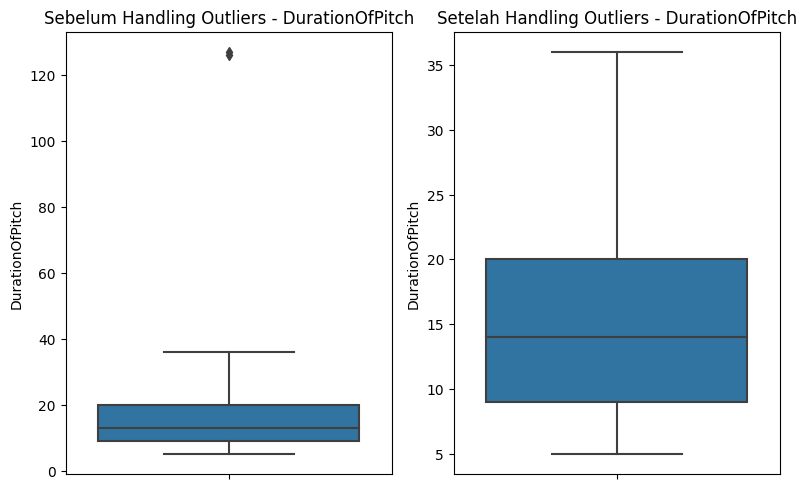

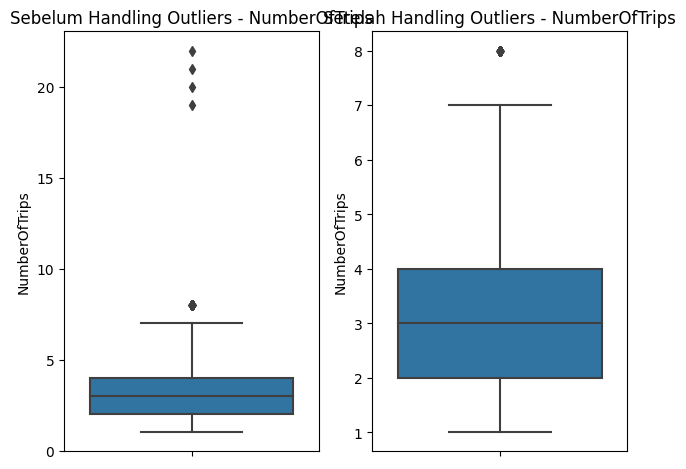

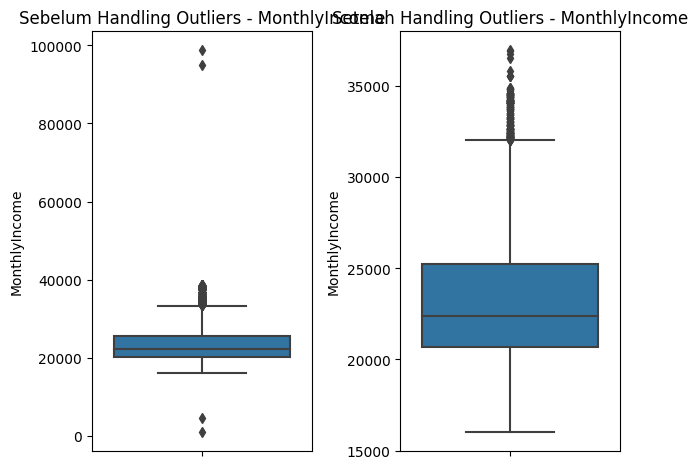

In [231]:
df_prep_before  = df.copy()

plt.figure(figsize=(8, 5))
for col in skewed_cols:
    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_prep_before[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_prep[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

## Feature Engineering

## Feature Selection

Diketahui dari percobaan code diatas bahwa semua feature dapat digunakan dikarenakan tidak ada yang redundant jika menggunakan threshold 0.7

In [232]:
nums = df_prep.select_dtypes(exclude=object).columns.tolist()
cats = df_prep.select_dtypes(include=object).columns.tolist()

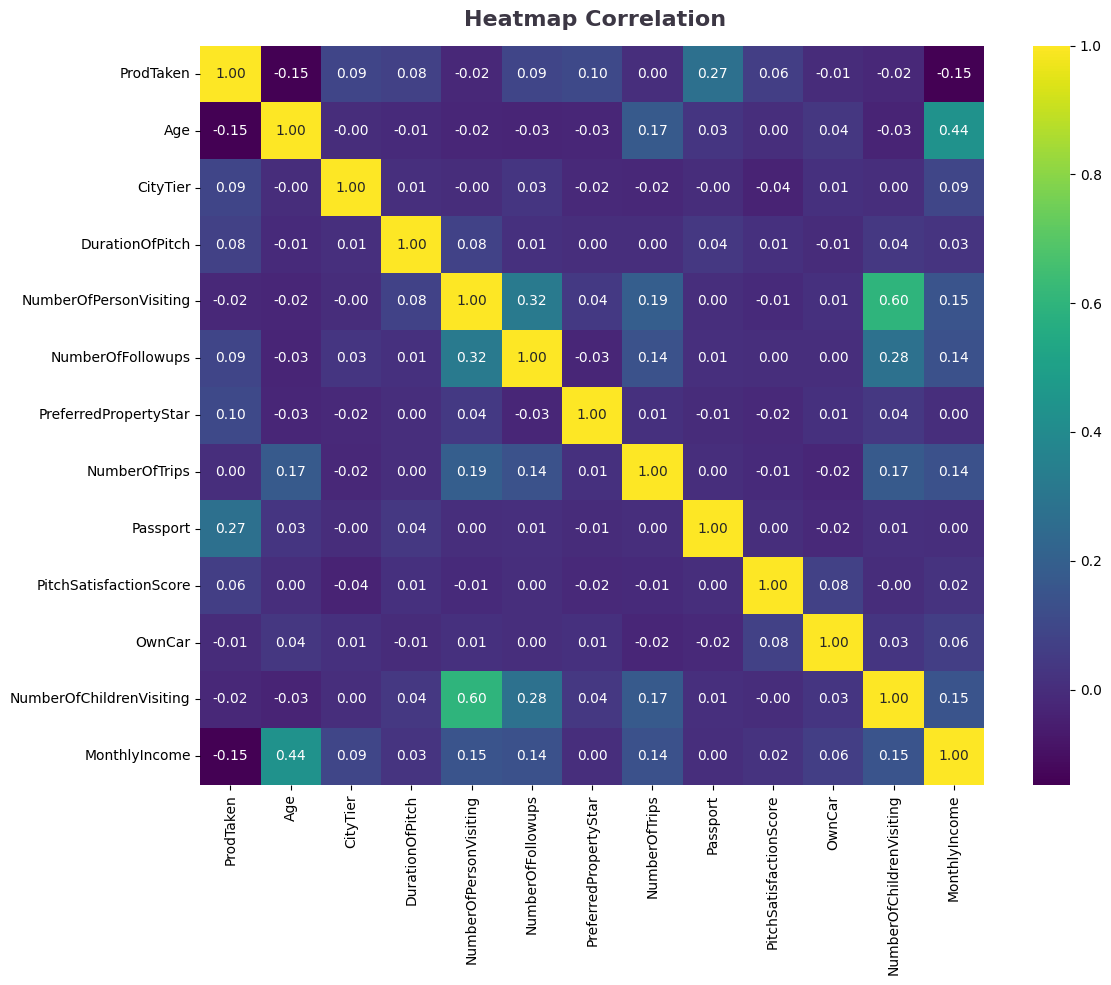

In [233]:
plt.figure(figsize=(12,10))
sns.heatmap(df_prep.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

In [234]:
# get correlation > +- 0.5
df_corr = df_prep[nums].corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.598


In [235]:
df_prep.duplicated().sum()

0

In [236]:
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0


In [237]:
df_prep.drop(columns=['NumberOfChildrenVisiting'], axis=1, inplace=True)

In [238]:
df_prep = df_prep.drop_duplicates()
df_prep.duplicated().sum()

0

In [239]:
df_clean = df_prep.copy()

### Feature Extraction

Melakukan segmentasi pada feature Age dan Income

### Feature Encoding

In [240]:
from sklearn.preprocessing import OneHotEncoder

In [241]:
# # label encoding
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})



In [242]:
df_prep['CityTier'].unique()

array([3, 1, 2], dtype=int64)

In [243]:
encoder = OneHotEncoder(sparse=False)
for col in ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender', 'PreferredPropertyStar', 'CityTier']:
    onehots = pd.get_dummies(df_prep[col], prefix=col)
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)

In [244]:
df_prep.shape

(3941, 29)

In [245]:
df_prep.columns

Index(['ProdTaken', 'Age', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'TypeofContact_Unknown', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Gender_Female', 'Gender_Male',
       'PreferredPropertyStar_3.0', 'PreferredPropertyStar_4.0',
       'PreferredPropertyStar_5.0', 'CityTier_1', 'CityTier_2', 'CityTier_3'],
      dtype='object')

### Feature Transformation

In [246]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaling using normalization
df_prep['Age'] = MinMaxScaler().fit_transform(df_prep['Age'].values.reshape(-1, 1))
# scaling using standardization
df_prep['DurationOfPitch'] = StandardScaler().fit_transform(df_prep['DurationOfPitch'].values.reshape(-1, 1))
df_prep['MonthlyIncome'] = StandardScaler().fit_transform(df_prep['MonthlyIncome'].values.reshape(-1, 1))

In [247]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,3941.0,2.128901e-01,0.409403,0.000000,0.000000,0.000000,0.000000,1.000000
Age,3941.0,4.456434e-01,0.212812,0.000000,0.302326,0.418605,0.581395,1.000000
DurationOfPitch,3941.0,-5.048261e-17,1.000127,-1.286391,-0.799579,-0.191063,0.539157,2.486408
NumberOfPersonVisiting,3941.0,2.943923e+00,0.718255,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfFollowups,3941.0,3.721137e+00,1.028346,0.000000,3.000000,4.000000,4.000000,6.000000
ProductPitched,3941.0,1.135499e+00,1.080473,0.000000,0.000000,1.000000,2.000000,4.000000
NumberOfTrips,3941.0,3.274042e+00,1.769742,1.000000,2.000000,3.000000,4.000000,8.000000
Passport,3941.0,2.948490e-01,0.456033,0.000000,0.000000,0.000000,1.000000,1.000000
PitchSatisfactionScore,3941.0,3.004821e+00,1.370548,1.000000,2.000000,3.000000,4.000000,5.000000
OwnCar,3941.0,6.034002e-01,0.489254,0.000000,0.000000,1.000000,1.000000,1.000000


### Split Data into training and testing

In [248]:
# X = df_prep[fix_cols] # menggunakan semua feature kecuali target
X = df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken')
y = df_prep['ProdTaken']

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #Splitting 

In [250]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3152, 28) (789, 28) (3152,) (789,)


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

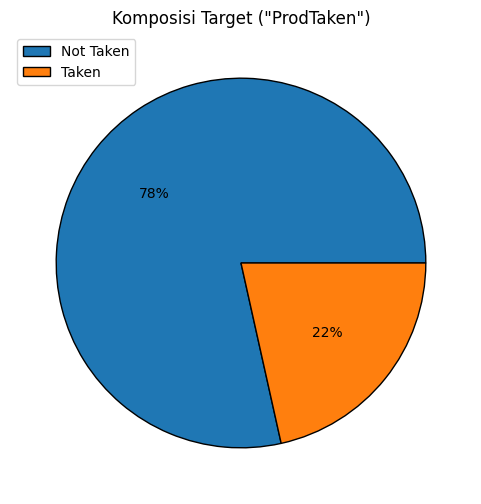

In [252]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi Target ("ProdTaken")')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

In [253]:
df_prep.ProdTaken.value_counts(normalize=True)

0    0.78711
1    0.21289
Name: ProdTaken, dtype: float64

Karena adanya imbalace pada target di data training make perlu dilakukan handling imbalance class

### Handling Imbalanced Class Dataset

In [254]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [255]:
sm = SMOTE(random_state = 42)
X_train, y_train= sm.fit_resample(X_train, y_train)

In [256]:
y_train.value_counts()

0    2474
1    2474
Name: ProdTaken, dtype: int64

# Modeling

In [257]:
from sklearn.metrics import confusion_matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    # masukin probability
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

## Fit Model

### Random Forest

In [258]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from scipy.stats import randint


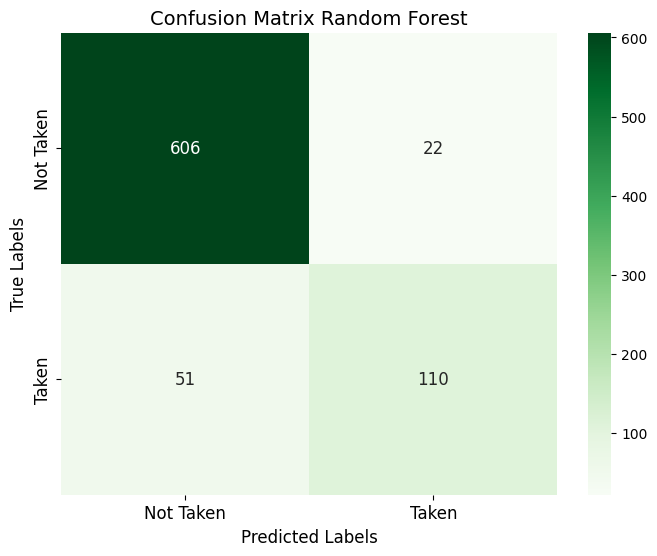

Accuracy (Test Set): 0.91
Precision (Test Set): 0.83
Recall (Test Set): 0.68
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [259]:
model_RF =  RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF, X_train, y_train, X_test, y_test)
model_RF.get_params()

### Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier

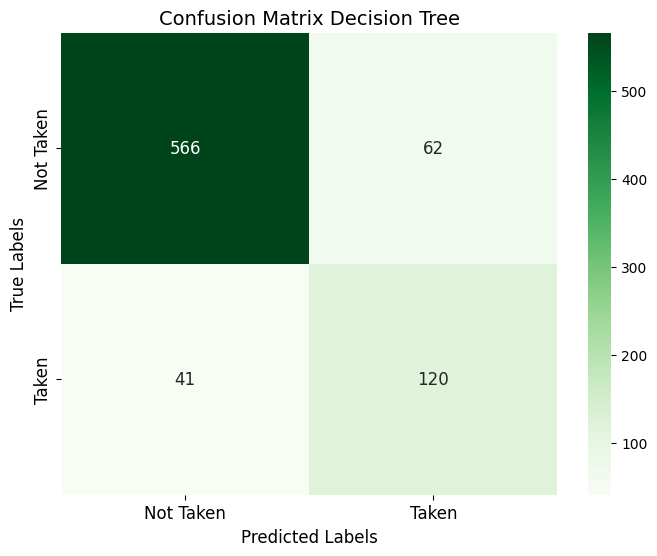

Accuracy (Test Set): 0.87
Precision (Test Set): 0.66
Recall (Test Set): 0.75
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [261]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT, X_train, y_train, X_test, y_test)
model_DT.get_params

### Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression

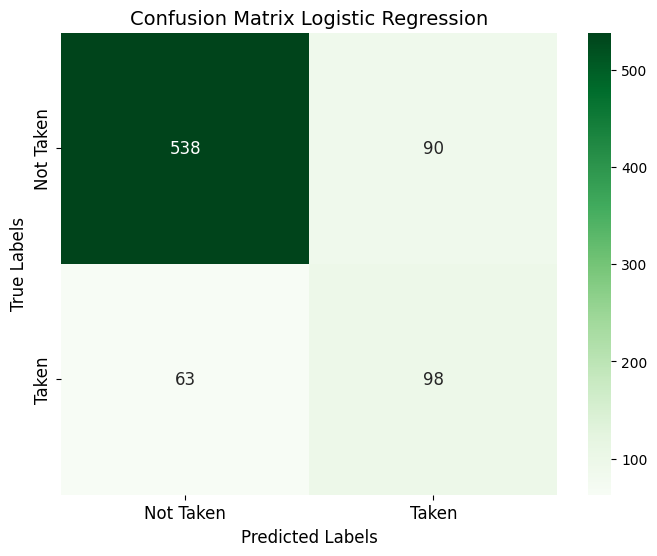

Accuracy (Test Set): 0.81
Precision (Test Set): 0.52
Recall (Test Set): 0.61
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.90


<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

In [263]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR, X_train, y_train, X_test, y_test)
model_LR.get_params

### Ada Boost

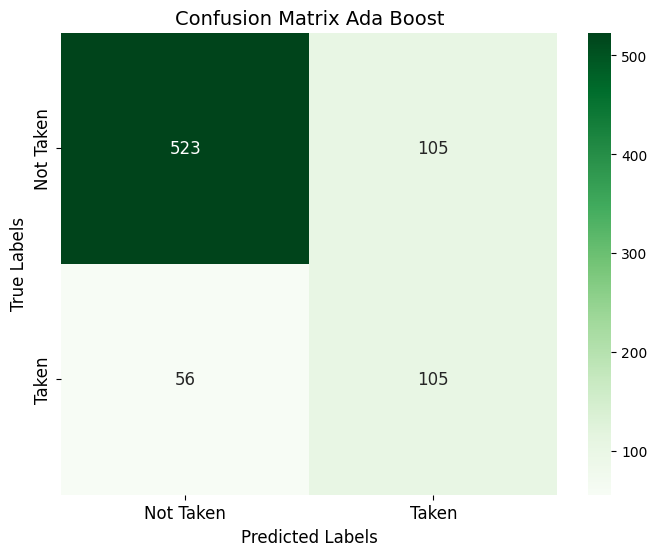

Accuracy (Test Set): 0.80
Precision (Test Set): 0.50
Recall (Test Set): 0.65
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.91


<bound method BaseEstimator.get_params of AdaBoostClassifier(random_state=42)>

In [264]:
from sklearn.ensemble import AdaBoostClassifier

model_ADB = AdaBoostClassifier(random_state=42)
model_ADB.fit(X_train, y_train)

plotting_confusion_matrix(model_ADB, X_test, y_test, title='Ada Boost')
eval_classification(model_ADB, X_train, y_train, X_test, y_test)
model_ADB.get_params

### XG Boost

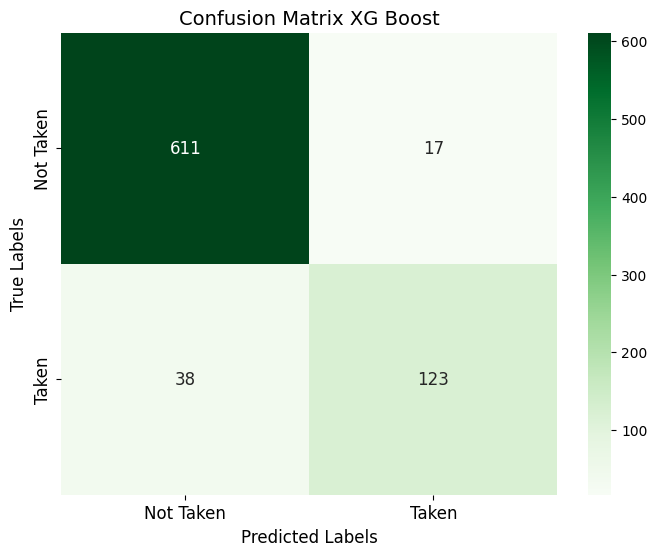

Accuracy (Test Set): 0.93
Precision (Test Set): 0.88
Recall (Test Set): 0.76
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)>

In [265]:
import xgboost as xgb

# Assuming X_train, X_test, y_train, and y_test are your training and testing data
model_XGB = xgb.XGBClassifier(verbosity=0, random_state=42)
model_XGB.fit(X_train, y_train)

plotting_confusion_matrix(model_XGB, X_test, y_test, title='XG Boost')
eval_classification(model_XGB, X_train, y_train, X_test, y_test)
model_XGB.get_params

In [266]:
def eval(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'XGBoost', 'Gradien Boosting']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model


In [267]:
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9075,0.8333,0.6832,0.7509,0.9516,1.0000
1,Decision Tree,0.8695,0.6593,0.7453,0.6997,0.8233,1.0000
2,Logistic Regression,0.8061,0.5213,0.6087,0.5616,0.8049,0.8988
3,AdaBoost,0.7959,0.5000,0.6522,0.5660,0.7902,0.9145
4,XGBoost,0.9303,0.8786,0.7640,0.8173,0.9536,1.0000


## Tuning Hyperparameter

In [268]:
list_hyperparameters = [
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], #
        'max_features' : ['sqrt'], #
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)], #
    },    
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
    }, 
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

In [269]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_tuned = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(model_RF, list_hyperparameters[0], cv=5, scoring='f1', random_state=42)
rf_tuned.fit(X_train, y_train)

plotting_confusion_matrix(rf_tuned, X_test, y_test, title='Random Forest (After Tuned)')
show_best_hyperparameter(rf_tuned, list_hyperparameters[0])
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

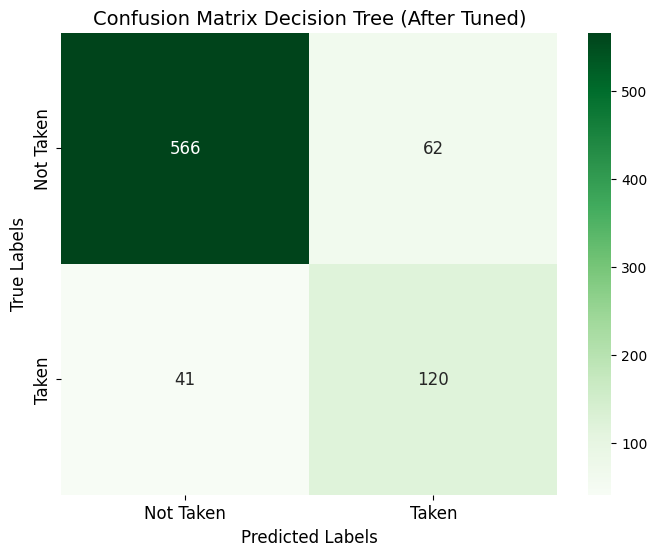

Best max_depth: 70
Best min_samples_leaf: 1
Accuracy (Test Set): 0.87
Precision (Test Set): 0.66
Recall (Test Set): 0.75
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


In [ ]:
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(model_DT, list_hyperparameters[1], cv=5, scoring='f1', random_state=42)
dt_tuned.fit(X_train, y_train)

plotting_confusion_matrix(dt_tuned, X_test, y_test, title='Decision Tree (After Tuned)')
show_best_hyperparameter(dt_tuned, list_hyperparameters[1])
eval_classification(model_DT, X_train, y_train, X_test, y_test)

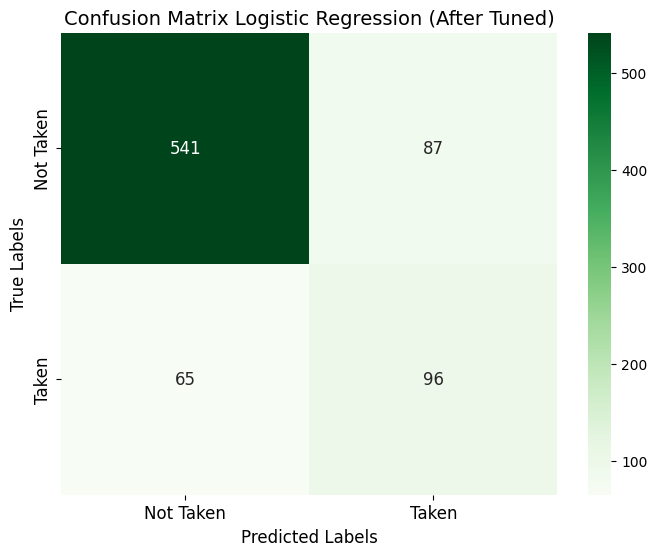

Best penalty: l2
Best C: 2.976351441631316
Accuracy (Test Set): 0.81
Precision (Test Set): 0.52
Recall (Test Set): 0.61
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.90


In [ ]:
lr_tuned = LogisticRegression(random_state=42)
lr_tuned = RandomizedSearchCV(model_LR, list_hyperparameters[2], cv=5, scoring='f1', random_state=42)
lr_tuned.fit(X_train, y_train)

plotting_confusion_matrix(lr_tuned, X_test, y_test, title='Logistic Regression (After Tuned)')
show_best_hyperparameter(lr_tuned, list_hyperparameters[2])
eval_classification(model_LR, X_train, y_train, X_test, y_test)

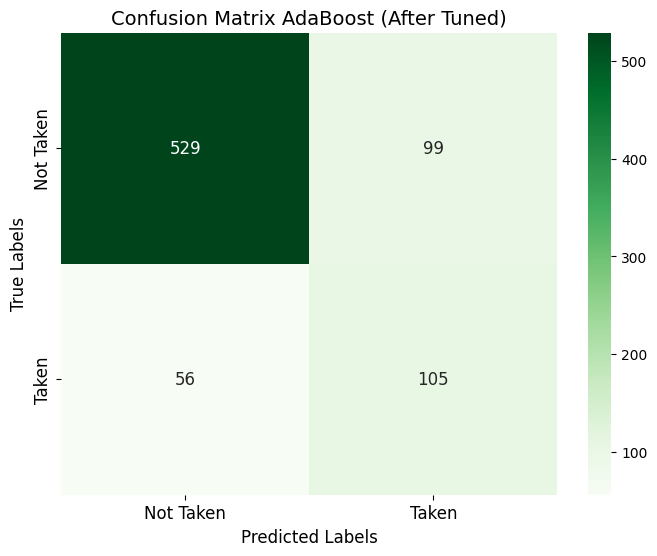

Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy (Test Set): 0.80
Precision (Test Set): 0.50
Recall (Test Set): 0.65
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.91


In [ ]:
adb_tuned = AdaBoostClassifier(random_state=42)
adb_tuned = RandomizedSearchCV(model_ADB, list_hyperparameters[3], cv=5, scoring='f1', random_state=42)
adb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(adb_tuned, X_test, y_test, title='AdaBoost (After Tuned)')
show_best_hyperparameter(adb_tuned, list_hyperparameters[3])
eval_classification(model_ADB, X_train, y_train, X_test, y_test)

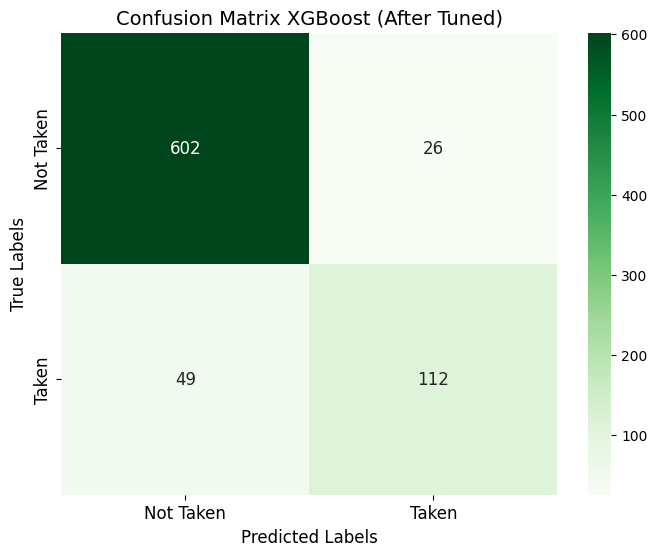

Best max_depth: 14
Best min_child_weight: 3
Best gamma: 0.4
Best tree_method: hist
Best colsample_bytree: 0.7000000000000001
Best learning_rate: 0.5757575757575758
Best reg_lambda: 0.8
Best reg_alpha: 0.4
Accuracy (Test Set): 0.93
Precision (Test Set): 0.88
Recall (Test Set): 0.76
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


In [ ]:
xgb_tuned = xgb.XGBClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(model_XGB, list_hyperparameters[4], cv=5, scoring='f1', random_state=42)
xgb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(xgb_tuned, X_test, y_test, title='XGBoost (After Tuned)')
show_best_hyperparameter(xgb_tuned, list_hyperparameters[4])
eval_classification(model_XGB, X_train, y_train, X_test, y_test)

In [ ]:
# base model
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9075,0.8333,0.6832,0.7509,0.9516,1.0000
1,Decision Tree,0.8695,0.6593,0.7453,0.6997,0.8233,1.0000
2,Logistic Regression,0.8061,0.5213,0.6087,0.5616,0.8049,0.8988
3,AdaBoost,0.7959,0.5000,0.6522,0.5660,0.7902,0.9145
4,XGBoost,0.9303,0.8786,0.7640,0.8173,0.9536,1.0000


In [ ]:
model_tuning = [rf_tuned, dt_tuned, lr_tuned,  adb_tuned, xgb_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

NameError: name 'dt_tuned' is not defined

# Feature Importance Analysis

In [ ]:
def show_feature_importance(model, title):
    if type(model).__name__ == 'LogisticRegression':
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        
    ax = feat_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='orange')
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance ' + title)

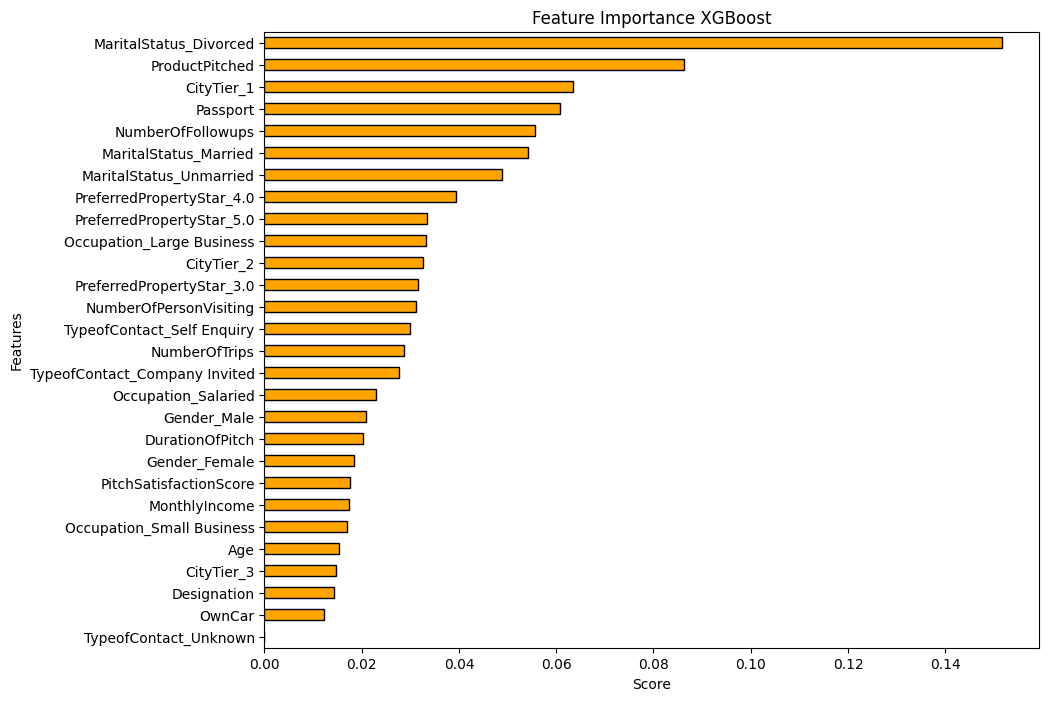

In [ ]:
# XGBoost
show_feature_importance(model_XGB, title='XGBoost')

## Feature Selection

Dari hasil feature importance kelima model tersebut, hanya akan dipilih berdasarkan 2 model terbaik yaitu Random Forest dan XGBoost dimana dari gabungan keduanya akan dipilih 20 fitur dari semua fitur yang ada yang akan coba dimodelkan ulang.

In [ ]:
# selecting feature by feature importance from model Random Forest and XGBoost
feature_rf = pd.Series(model_RF.feature_importances_, index=X.columns).nlargest(20).index.tolist()
feature_xgb = pd.Series(model_XGB.feature_importances_, index=X.columns).nlargest(20).index.tolist()

selected_cols = [col for col in feature_rf]
for col in feature_xgb:
    if col not in selected_cols:
        selected_cols.append(col)
        
selected_cols

['MonthlyIncome',
 'DurationOfPitch',
 'Age',
 'NumberOfFollowups',
 'NumberOfTrips',
 'Passport',
 'ProductPitched',
 'PitchSatisfactionScore',
 'MaritalStatus_Married',
 'Designation',
 'MaritalStatus_Divorced',
 'NumberOfPersonVisiting',
 'CityTier_1',
 'PreferredPropertyStar_3.0',
 'MaritalStatus_Unmarried',
 'TypeofContact_Self Enquiry',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'Gender_Female',
 'PreferredPropertyStar_4.0',
 'PreferredPropertyStar_5.0',
 'Occupation_Large Business',
 'CityTier_2',
 'TypeofContact_Company Invited',
 'Gender_Male']

# Data Modelling #2

Pada modelling ini akan digunakan kolom berdasarkan feature importance sebelumnya dimana hasilnya kurang lebih sama dengan hasil feature selection saat preprocessing sebelumnya.

In [ ]:
# create train and test set using selected feature
X_train2 = X_train[selected_cols]
y_train2 = y_train.copy()
X_test2 = X_test[selected_cols]
y_test2 = y_test.copy()

## Model Selection

### 1. Logistic Regression

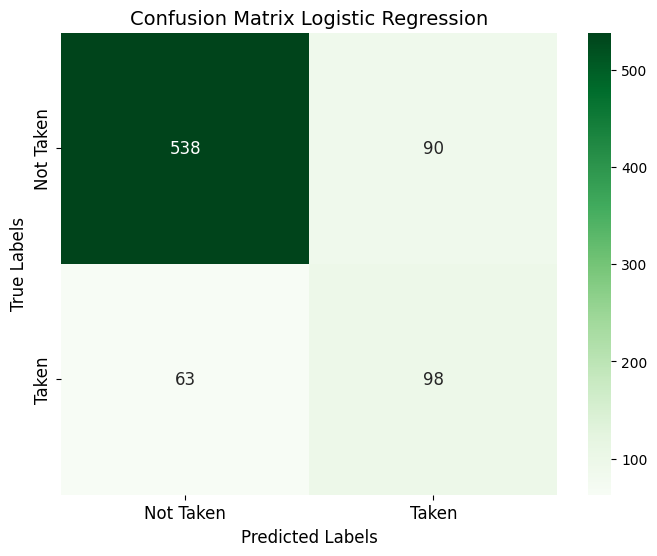

Accuracy (Test Set): 0.81
Precision (Test Set): 0.52
Recall (Test Set): 0.61
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.90


In [ ]:
model_lr2 = LogisticRegression(random_state=42)
model_lr2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_lr2, X_test2, y_test2, title='Logistic Regression')
eval_classification(model_lr2, X_train2, y_train2, X_test2, y_test2)

### 2. Decision Tree

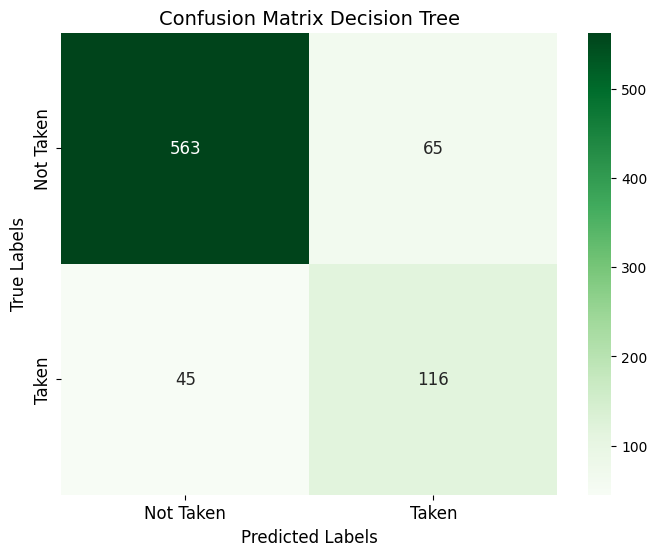

Accuracy (Test Set): 0.86
Precision (Test Set): 0.64
Recall (Test Set): 0.72
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.81
roc_auc (train-proba): 1.00


In [ ]:
model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_dt2, X_test2, y_test2, title='Decision Tree')
eval_classification(model_dt2, X_train2, y_train2, X_test2, y_test2)

### 3. Random Forest

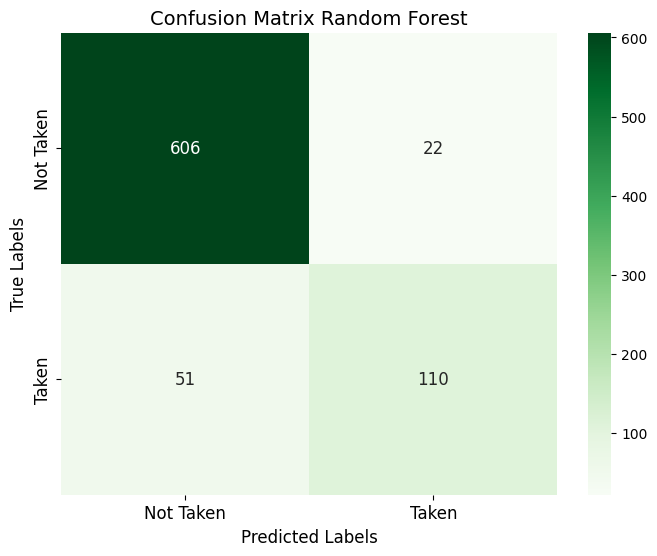

Accuracy (Test Set): 0.91
Precision (Test Set): 0.83
Recall (Test Set): 0.68
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


In [ ]:
model_rf2 = RandomForestClassifier(random_state=42)
model_rf2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_rf2, X_test2, y_test2, title='Random Forest')
eval_classification(model_rf2, X_train2, y_train2, X_test2, y_test2)

### 4. AdaBoost

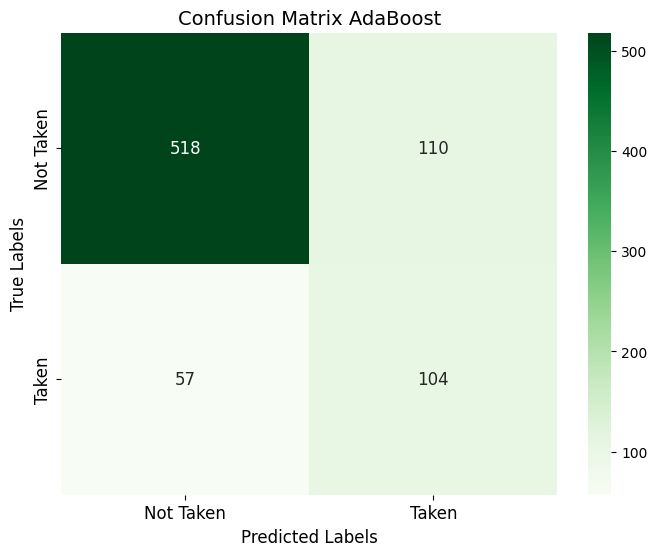

Accuracy (Test Set): 0.79
Precision (Test Set): 0.49
Recall (Test Set): 0.65
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.91


In [ ]:
model_adb2 = AdaBoostClassifier(random_state=42)
model_adb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_adb2, X_test2, y_test2, title='AdaBoost')
eval_classification(model_adb2, X_train2, y_train2, X_test2, y_test2)

### 5. XGBoost

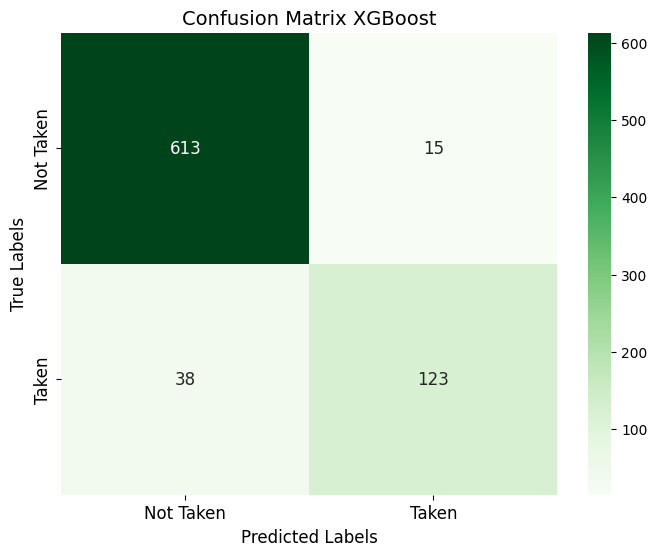

Accuracy (Test Set): 0.93
Precision (Test Set): 0.89
Recall (Test Set): 0.76
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


In [ ]:
model_xgb2 = XGBClassifier(verbosity=0, random_state=42)
model_xgb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_xgb2, X_test2, y_test2, title='XGBoost')
eval_classification(model_xgb2, X_train2, y_train2, X_test2, y_test2)

## Model Evaluation

In [ ]:
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9075,0.8333,0.6832,0.7509,0.9516,1.0000
1,Decision Tree,0.8695,0.6593,0.7453,0.6997,0.8233,1.0000
2,Logistic Regression,0.8061,0.5213,0.6087,0.5616,0.8049,0.8988
3,AdaBoost,0.7959,0.5000,0.6522,0.5660,0.7902,0.9145
4,XGBoost,0.9303,0.8786,0.7640,0.8173,0.9536,1.0000


In [ ]:
model_tuning = [rf_tuned, dt_tuned, lr_tuned,  adb_tuned, xgb_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9138,0.8394,0.7143,0.7718,0.9562,1.0000
1,Decision Tree,0.8695,0.6593,0.7453,0.6997,0.8233,1.0000
2,Logistic Regression,0.8074,0.5246,0.5963,0.5581,0.8041,0.8994
3,AdaBoost,0.8035,0.5147,0.6522,0.5753,0.8284,0.9240
4,XGBoost,0.9049,0.8116,0.6957,0.7492,0.9269,0.9999


In [ ]:
# scoring base model
model_list_base2 = [model_rf2, model_dt2, model_lr2,model_adb2, model_xgb2]
score_all_classification(model_list_base2, X_train2, y_train2, X_test2, y_test2)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9075,0.8333,0.6832,0.7509,0.9559,1.0000
1,Decision Tree,0.8606,0.6409,0.7205,0.6784,0.8085,1.0000
2,Logistic Regression,0.8061,0.5213,0.6087,0.5616,0.8063,0.8971
3,AdaBoost,0.7883,0.4860,0.6460,0.5547,0.7971,0.9147
4,XGBoost,0.9328,0.8913,0.7640,0.8227,0.9534,1.0000


### Model Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_xgb2,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96958175 0.94543147 0.94670051 0.92385787 0.94670051]
Average Cross Validation score :0.9464544208758756


# Feature Importance

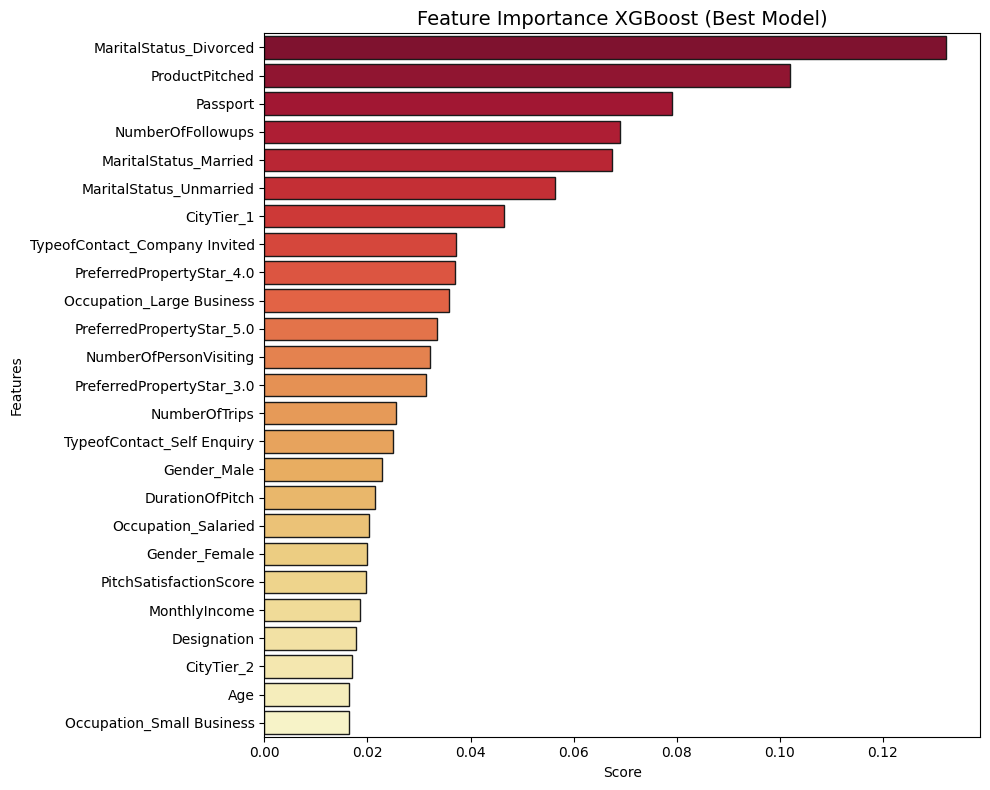

In [ ]:
feature_importance_xgb = pd.Series(model_xgb2.feature_importances_, index=X[selected_cols].columns)
df_feature = feature_importance_xgb.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan Feature Importance XGBoost diatas didatapakan Top 5 Features yang paling penting adalah 'MaritalStatus', 'ProductPitched', 'CityTier', 'NumerOfFollowups', dan 'Passport'

## Business insights

In [ ]:
best_model = model_xgb2
pred_test = best_model.predict(X_test2)
pred_train = best_model.predict(X_train2)
df_pred_test = pd.DataFrame({'ProdTaken':y_test2, 'ProdTaken_Pred':pred_test}, index=y_test2.index.copy())
df_pred_train = pd.DataFrame({'ProdTaken':y_train2, 'ProdTaken_Pred':pred_train}, index=y_train2.index.copy())

# combine prediction labels into features column on clean data
df_test = df_clean[df_clean.index.isin(df_pred_test.index)]
df_train = df_clean[df_clean.index.isin(df_pred_train.index)]
df_final_test = pd.concat([df_test.drop('ProdTaken', axis=1), df_pred_test], axis=1)
df_final_train = pd.concat([df_train.drop('ProdTaken', axis=1), df_pred_train], axis=1)
df_final_all = df_final_train.append(df_final_test).reset_index()
df_final_all.head()

,index,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,ProdTaken,ProdTaken_Pred
0,0,41.0,Self Enquiry,3.0,6.0,Salaried,Female,3.0,3.0,Deluxe,3.0,Unmarried,1.0,1.0,2.0,1.0,Manager,20993.0,0,0
1,1,49.0,Company Invited,1.0,14.0,Salaried,Male,3.0,4.0,Deluxe,4.0,Divorced,2.0,0.0,3.0,1.0,Manager,20130.0,0,0
2,3,33.0,Company Invited,1.0,9.0,Salaried,Female,2.0,3.0,Basic,3.0,Divorced,2.0,1.0,5.0,1.0,Executive,17909.0,0,0
3,5,32.0,Company Invited,1.0,8.0,Salaried,Male,3.0,3.0,Basic,3.0,Unmarried,1.0,0.0,5.0,1.0,Executive,18068.0,0,0
4,6,59.0,Self Enquiry,1.0,9.0,Small Business,Female,2.0,2.0,Basic,5.0,Divorced,5.0,1.0,2.0,1.0,Executive,17670.0,1,1


### Customer dengan Marital Status apa yang lebih cenderung membeli paket liburan?

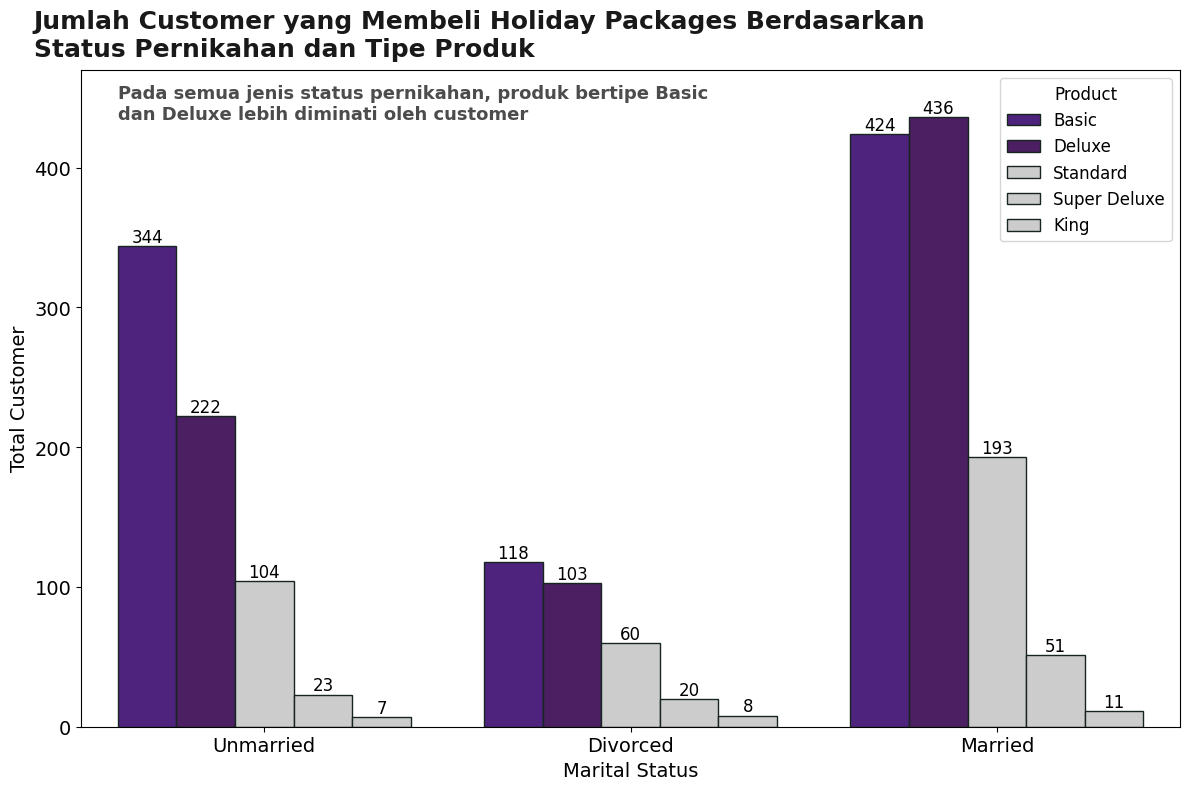

In [ ]:
# Product labels and palettes
product_labs = ['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King']
product_palettes = ['#4E148C', '#4E146C', '#CCCCCC', '#CCCCCC', '#CCCCCC']

# Create a countplot with customized colors for 'Basic' and 'Deluxe'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.countplot(
    data=df_final_all[df_final_all['ProdTaken'] == 1],
    x='MaritalStatus',
    hue='ProductPitched',
    order=['Unmarried', 'Divorced', 'Married'],
    hue_order=product_labs,
    palette=product_palettes,
    edgecolor='#162521'
)

# Set axis labels and tick parameters
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)


# Set y-axis limit
ax.set_ylim(0, 470)

# Add data labels and legend
for container in ax.containers:
    ax.bar_label(container, size=12)


ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='best')

# Add title
ax.text(
    s="Jumlah Customer yang Membeli Holiday Packages Berdasarkan\nStatus Pernikahan dan Tipe Produk",
    x=-0.63,
    y=480,
    fontsize=18,
    fontweight='bold',
    alpha=0.9
)

ax.text(
    s="Pada semua jenis status pernikahan, produk bertipe Basic\ndan Deluxe lebih diminati oleh customer",
    x=-0.4,
    y=435,
    fontsize=13,
    fontweight='bold',
    alpha=0.7
)

plt.tight_layout()
plt.show()


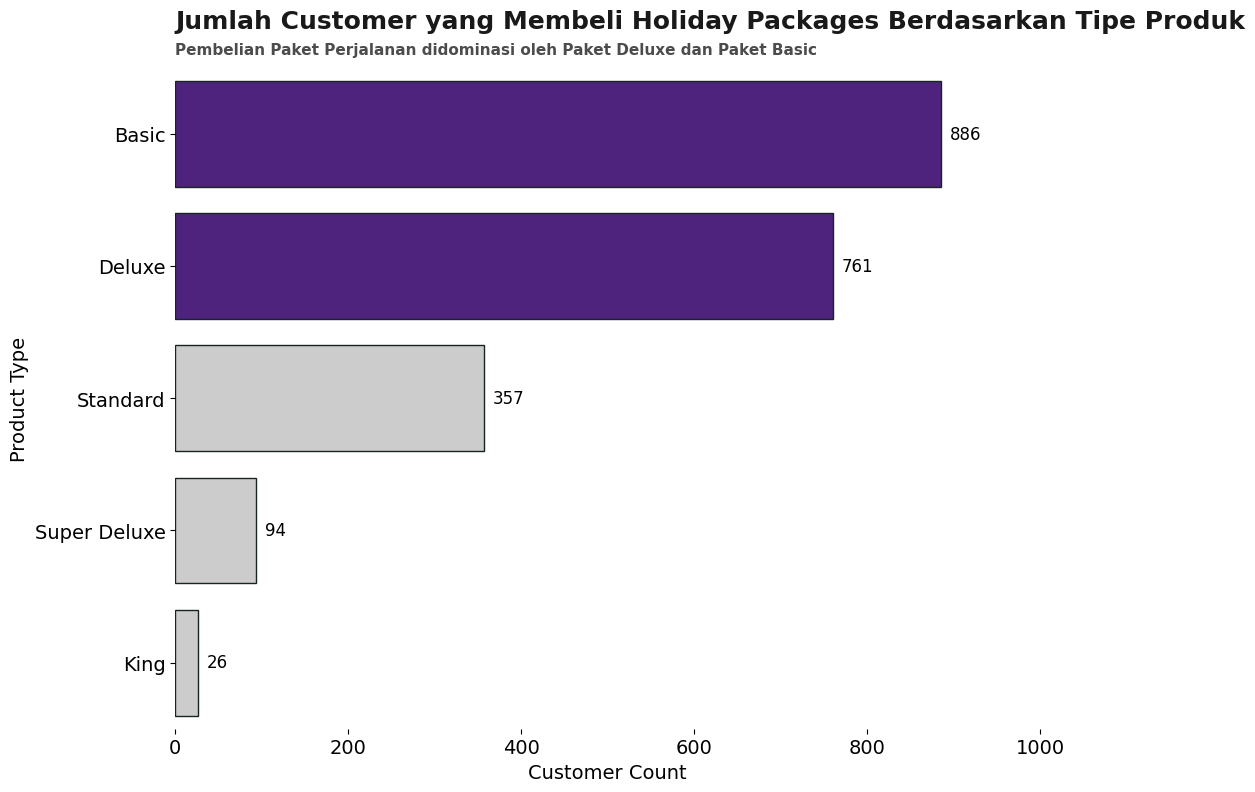

In [ ]:
# Product labels and palettes
product_palettes = ['#4E148C', '#4E148C', '#CCCCCC', '#CCCCCC', '#CCCCCC']

# Menambahkan fungsi groupby untuk menghitung jumlah 'ProductPitched' dan mengurutkannya
df_sorted = df_final_all[df_final_all['ProdTaken'] == 1].groupby('ProductPitched').agg({'ProductPitched':'count'}).rename(columns={'ProductPitched':'Customer Count'}).sort_values(by='Customer Count', ascending=False)


# Create a countplot with customized colors for 'Basic' and 'Deluxe'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(
    data=df_sorted,
    x='Customer Count',
    y=df_sorted.index, 
    palette=product_palettes,
    edgecolor='#162521'
)

# Set axis labels and tick parameters
ax.set_xlabel('Customer Count', fontsize=14)
ax.set_ylabel('Product Type', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

# Hilangkan frame (tepi-edges)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Hilangkan grid
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set x-axis limit
ax.set_xlim(0, 1000)


# Add data labels and legend
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

# Add title
ax.text(
    s="Jumlah Customer yang Membeli Holiday Packages Berdasarkan Tipe Produk",
    x=0,
    y=-0.8,
    fontsize=18,
    fontweight='bold',
    alpha=0.9
)

ax.text(
    s="Pembelian Paket Perjalanan didominasi oleh Paket Deluxe dan Paket Basic",
    x=0,
    y=-0.6,
    fontsize=11,
    fontweight='bold',
    alpha=0.7
)

plt.tight_layout()
plt.show()


### Bagaimana distribusi pembelian paket liburan berdasarkan City Tier pada masing-masing jenis produk?

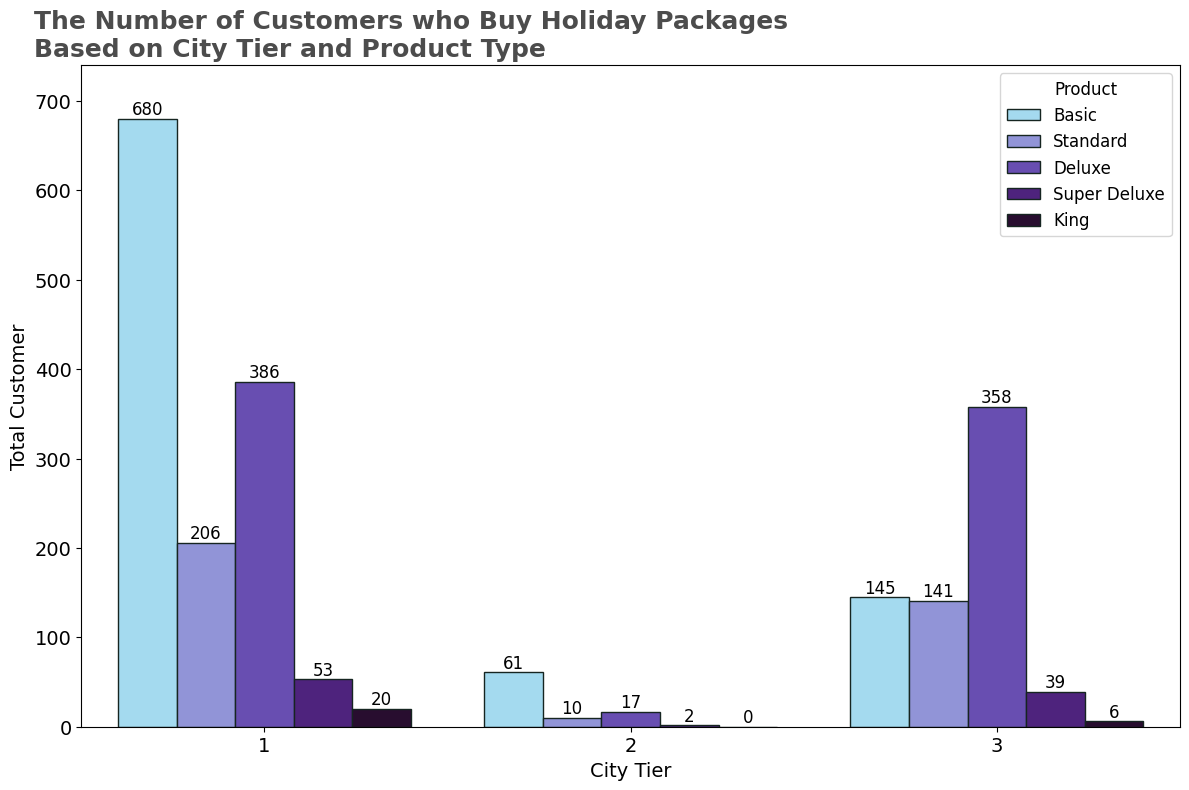

In [ ]:
#City Labels
city = ['City Tier 1', 'City Tier 2', 'City Tier 3']

fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='CityTier', hue='ProductPitched',
                    hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('City Tier', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 740)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

# Set x-axis ticks and labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1', '2', '3'])

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='upper right')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on City Tier and Product Type", 
        x=-0.63, y=750, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

Untuk mengefensiensikan penawaran produk dapat dilakukan kepada kota dengan tier 1 atau 3

### Berapa banyak Numer Of Followups yang perlu dilakukan sehingga customers mau membeli produk berdasarkan jenis produknya

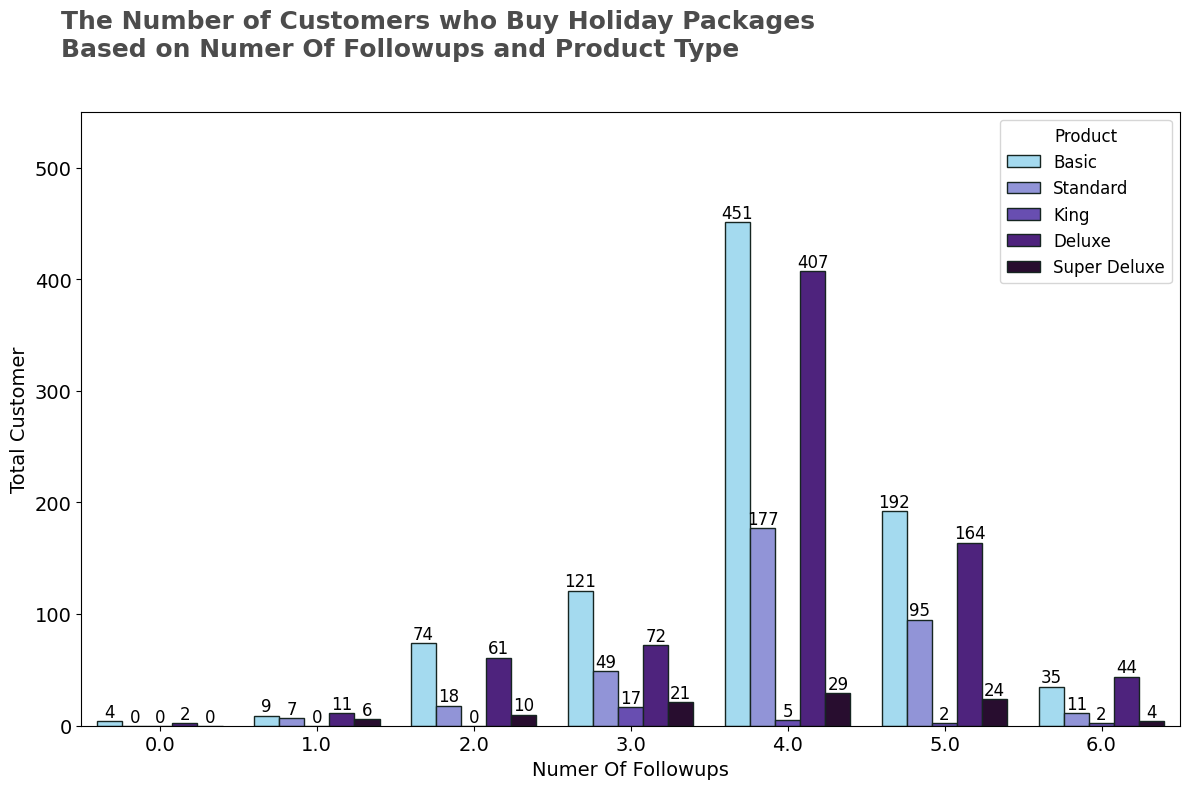

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='NumberOfFollowups', hue='ProductPitched',
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Numer Of Followups', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 550)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='upper right')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Numer Of Followups and Product Type", 
        x=-0.63, y=600, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

Untuk mendapatkan customers setidaknya lakukan minimal 4 kali follow up terkait penawaran produk

### Bagaimana distribusi dari pembelian paket liburan yang diambil customer berdasarkan kepemilikan passport dan product type

In [ ]:
df_product_taken = df_final_all[df_final_all['ProdTaken']==1]
df_product_passport = pd.crosstab(df_product_taken['ProductPitched'], df_product_taken['Passport'], normalize='index')*100
df_product_passport = df_product_passport.stack().reset_index(name='Percentage')
df_product_passport

,ProductPitched,Passport,Percentage
0,Basic,0.0,66.817156
1,Basic,1.0,33.182844
2,Deluxe,0.0,70.170828
3,Deluxe,1.0,29.829172
4,King,0.0,65.384615
5,King,1.0,34.615385
6,Standard,0.0,69.747899
7,Standard,1.0,30.252101
8,Super Deluxe,0.0,62.765957
9,Super Deluxe,1.0,37.234043


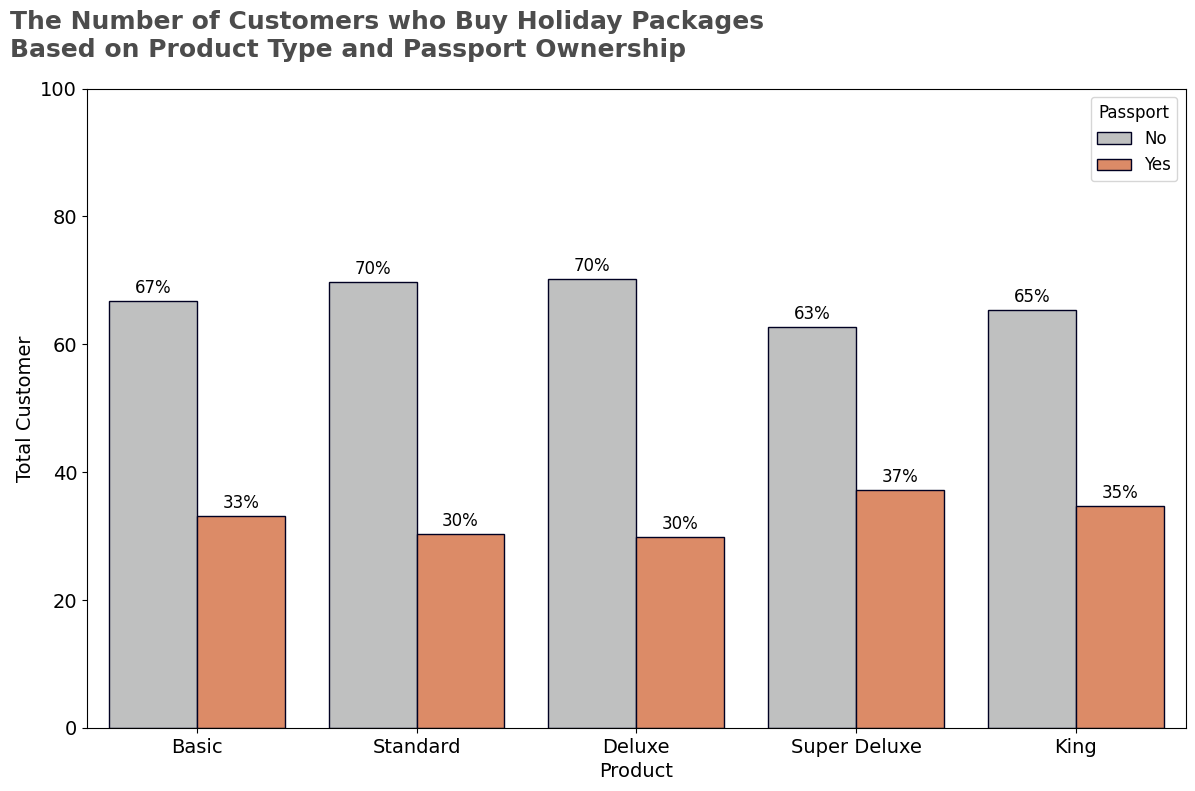

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
ax = sns.barplot(data=df_product_passport, x='ProductPitched', y='Percentage', hue='Passport',
              order=product_labs, palette=['#BFC0C0', '#EF8354'], edgecolor='#000022')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Product', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 100)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[100]], colors='#04724D', alpha=0.2)
# plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#000022', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', size=12, padding=3)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=12, title_fontsize=12, title='Passport')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Product Type and Passport Ownership", 
        x=-0.85, y=105, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

## Analyzing Customer Preferences: A Focus on Executive Designation

In [ ]:
df_exe = df_clean[df_clean['Designation']=='Executive']

### Customer dengan Marital Status apa yang lebih cenderung membeli paket liburan?

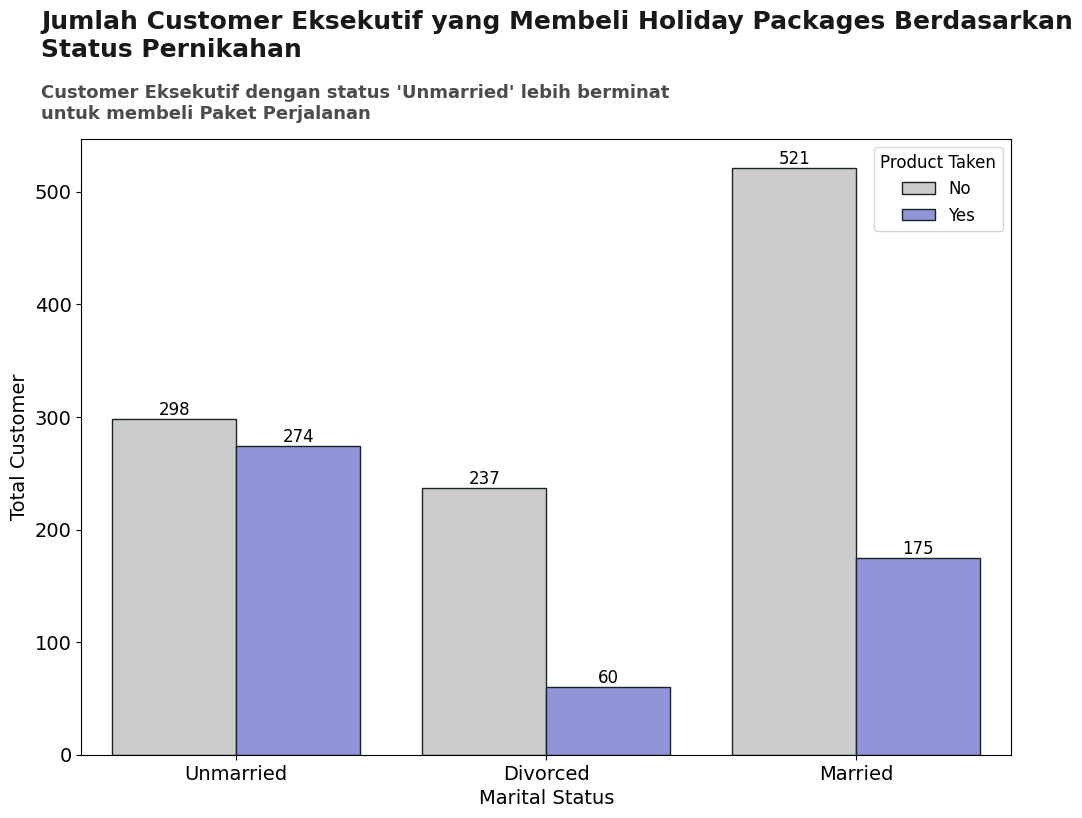

In [ ]:
# Product labels and palettes
product_palettes = ['#CCCCCC','#858AE3']

# Create a countplot with customized colors for 'Basic' and 'Deluxe'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.countplot(
    data=df_exe,
    x='MaritalStatus',
    hue='ProdTaken',
    order=['Unmarried', 'Divorced', 'Married'],
    palette=product_palettes,
    edgecolor='#162521'
)

# Set axis labels and tick parameters
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)


# # Set y-axis limit
# ax.set_ylim(0, 470)

# Add data labels and legend
for container in ax.containers:
    ax.bar_label(container, size=12)


legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=12, title_fontsize=12, title='Product Taken', loc='best')

# Add title
ax.text(
    s="Jumlah Customer Eksekutif yang Membeli Holiday Packages Berdasarkan\nStatus Pernikahan",
    x=-0.63,
    y=620,
    fontsize=18,
    fontweight='bold',
    alpha=0.9
)

ax.text(
    s="Customer Eksekutif dengan status 'Unmarried' lebih berminat\nuntuk membeli Paket Perjalanan",
    x=-0.63,
    y=565,
    fontsize=13,
    fontweight='bold',
    alpha=0.7
)

plt.show()


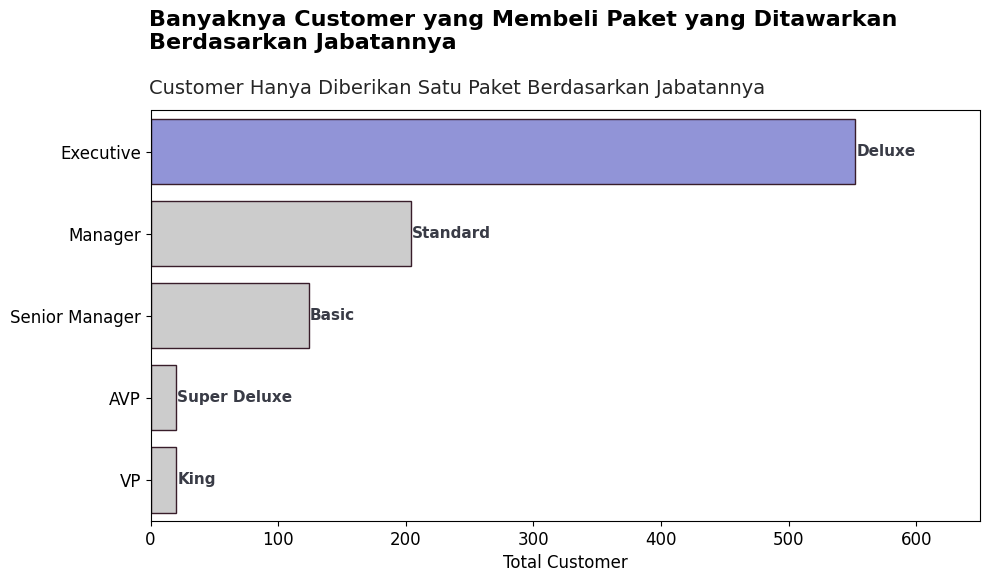

In [ ]:
job_level = ['Executive','Manager', 'Senior Manager',  'AVP','VP']
job_colors = ['#858AE3', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC']
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=df[df['ProdTaken']==1], y='Designation', order=job_level, palette=job_colors, edgecolor='#381D2A', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0, 650)
plt.xlabel('Total Customer', fontsize=12)
plt.ylabel('')

job_bars = ['Deluxe', 'Standard', 'Basic', 'Super Deluxe', 'King']
job_data = (df['Designation'].value_counts(normalize=True)*100).reindex(job_level).values.tolist()
for rec, job in zip(ax.patches, job_bars) :
    ax.text(rec.get_x() + rec.get_width() +1,
            rec.get_y() + rec.get_height() /2,
            job, fontsize=11, fontweight='bold',
            color='#161925', alpha=0.85, va='center', ha='left')



ax.text(s='Banyaknya Customer yang Membeli Paket yang Ditawarkan\nBerdasarkan Jabatannya', 
        x=-1.05, y=-1.25, fontsize=16, fontweight='bold', alpha =1)
ax.text(s='Customer Hanya Diberikan Satu Paket Berdasarkan Jabatannya',
        x=-1.05, y=-0.7, fontsize=14, alpha =.85)
plt.tight_layout()
plt.show()

### Bagaimana distribusi pembelian paket liburan berdasarkan City Tier pada masing-masing jenis produk?

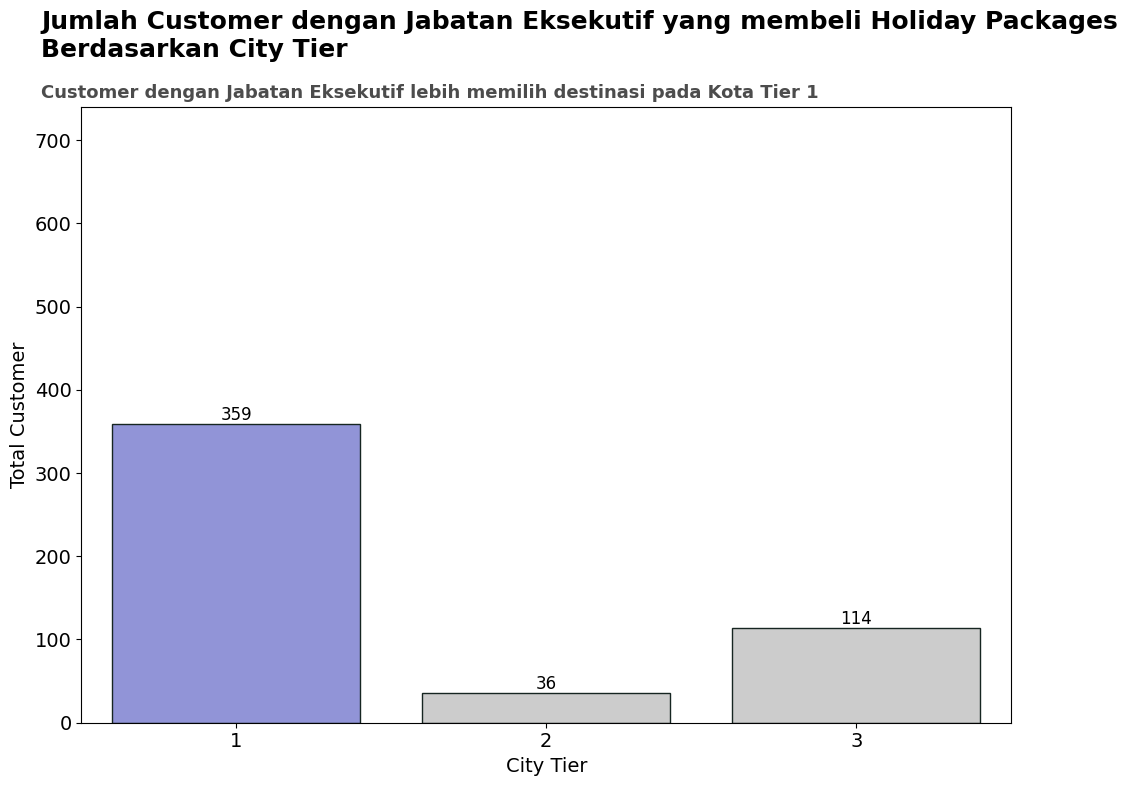

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_palettes = ['#858AE3', '#CCCCCC', '#CCCCCC']
ax = sns.countplot(data=df_exe[df_exe['ProdTaken']==1], x='CityTier',
                    hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('City Tier', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 740)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

# Set x-axis ticks and labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1', '2', '3'])

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.text(s="Jumlah Customer dengan Jabatan Eksekutif yang membeli Holiday Packages\nBerdasarkan City Tier", 
        x=-0.63, y=800, fontsize=18, fontweight='bold', alpha =1)

ax.text(
    s="Customer dengan Jabatan Eksekutif lebih memilih destinasi pada Kota Tier 1",
    x=-0.63,
    y=750,
    fontsize=13,
    fontweight='bold',
    alpha=0.7
)

plt.show()

### Berapa banyak Numer Of Followups yang perlu dilakukan sehingga customers mau membeli produk berdasarkan jenis produknya

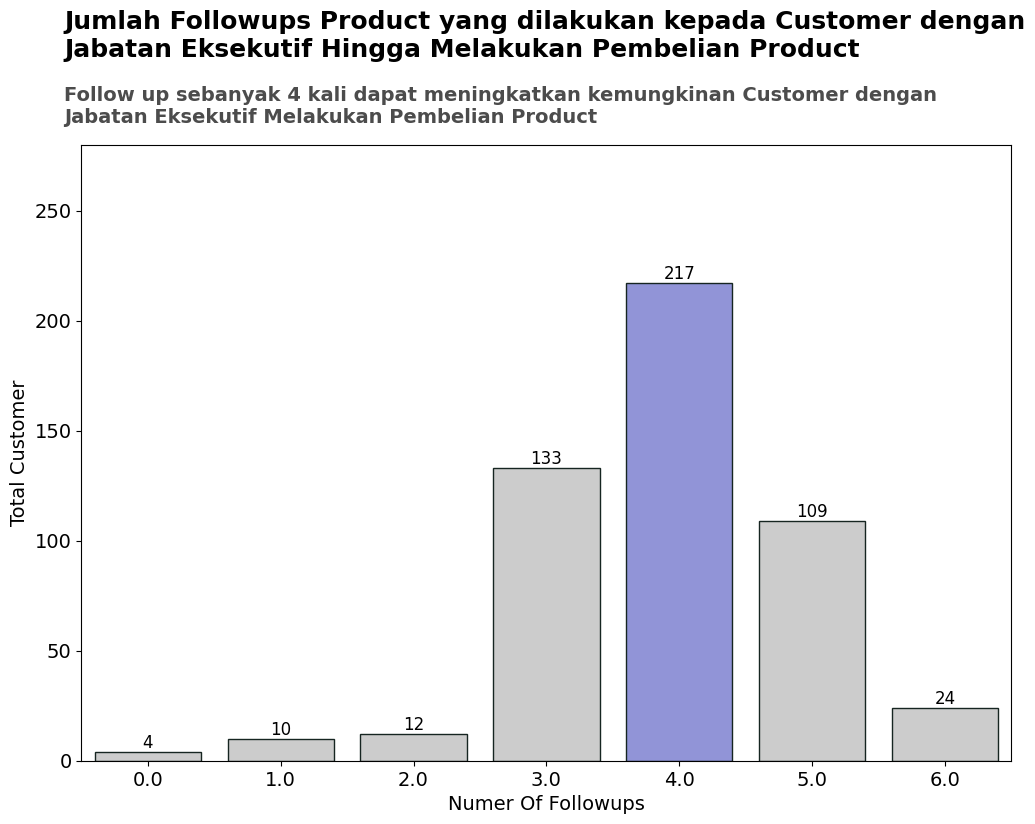

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_palettes = ['#CCCCCC','#CCCCCC','#CCCCCC','#CCCCCC','#858AE3','#CCCCCC']
ax = sns.countplot(data=df_exe[df_exe['ProdTaken']==1], x='NumberOfFollowups',
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Numer Of Followups', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 280)
   
for container in ax.containers:
    ax.bar_label(container, size=12)

ax.text(s="Jumlah Followups Product yang dilakukan kepada Customer dengan\nJabatan Eksekutif Hingga Melakukan Pembelian Product", 
        x=-0.63, y=320, fontsize=18, fontweight='bold', alpha =1)

ax.text(s="Follow up sebanyak 4 kali dapat meningkatkan kemungkinan Customer dengan\nJabatan Eksekutif Melakukan Pembelian Product", 
        x=-0.63, y=290, fontsize=14, fontweight='bold', alpha =.7)

plt.show()

### Bagaimana distribusi dari pembelian paket liburan yang diambil customer berdasarkan kepemilikan passport dan product type

In [ ]:
df_product_taken = df_exe[df_exe['ProdTaken']==1]
df_product_passport = pd.crosstab(df_product_taken['ProductPitched'], df_product_taken['Passport'], normalize='index')*100
df_product_passport = df_product_passport.stack().reset_index(name='Percentage')
df_product_passport

,ProductPitched,Passport,Percentage
0,Basic,0,41.650295
1,Basic,1,58.349705


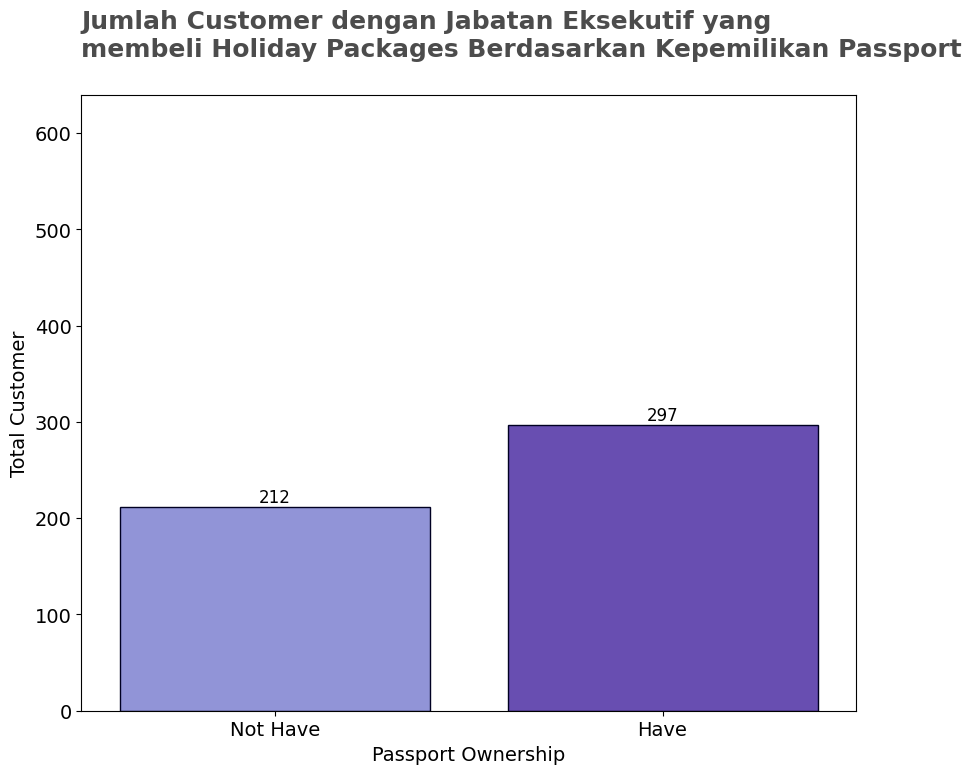

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.countplot(data=df_product_taken, x='Passport',
              palette=['#858AE3', '#613DC1'], edgecolor='#000022')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Passport Ownership', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 640)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[100]], colors='#04724D', alpha=0.2)
# plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#000022', linestyle='--', linewidth=3) 

# Set x-axis ticks and labels
ax.set_xticks([0, 1, ])
ax.set_xticklabels(['Not Have', 'Have'])

for container in ax.containers:
    ax.bar_label(container, size=12)

legend_labels, _= ax.get_legend_handles_labels()
ax.text(s="Jumlah Customer dengan Jabatan Eksekutif yang\nmembeli Holiday Packages Berdasarkan Kepemilikan Passport", 
        x=-0.5, y=680, fontsize=18, fontweight='bold', alpha =.7)
plt.show()

## Business Impact

In [ ]:
import random

In [ ]:
random_sample = df_prep.sample(n=1000, random_state=42)
random_sample_ins = df_clean.sample(n=1000, random_state=42)

In [ ]:
# X = df_prep[fix_cols] # menggunakan semua feature kecuali target
X_sim = random_sample.select_dtypes(exclude=object).drop(columns='ProdTaken')
y_sim = random_sample['ProdTaken']

In [ ]:
X_train_sim = X_sim[selected_cols]
y_train_sim = y_sim.copy()

In [ ]:
model_xgb_sim = XGBClassifier(verbosity=0, random_state=42)
model_xgb_sim.fit(X_train_sim, y_train_sim)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
best_model_sim = model_xgb_sim
pred_train_sim = best_model.predict(X_train_sim)
df_pred_train_sim = pd.DataFrame({'ProdTaken':y_train_sim, 'ProdTaken_Pred':pred_train_sim}, index=y_train_sim.index.copy())

# combine prediction labels into features column on clean data
df_final_all_sim = pd.concat([random_sample_ins.drop('ProdTaken', axis=1), df_pred_train_sim], axis=1).reset_index()
df_final_all_sim.head()

,index,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,ProdTaken,ProdTaken_Pred
0,1255,33.0,Self Enquiry,3,22.0,Salaried,Female,3,3.0,Standard,5.0,Unmarried,3.0,1,5,0,Senior Manager,23564.0,1,1
1,1219,29.0,Self Enquiry,1,15.0,Small Business,Female,2,3.0,Basic,3.0,Married,1.0,0,5,1,Executive,17974.0,0,0
2,934,25.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Basic,4.0,Unmarried,2.0,0,3,1,Executive,17096.0,0,0
3,4674,54.0,Company Invited,3,9.0,Small Business,Female,3,5.0,Standard,4.0,Married,4.0,0,1,1,Senior Manager,26203.0,0,0
4,1582,54.0,Company Invited,2,32.0,Salaried,Female,1,1.0,Super Deluxe,3.0,Unmarried,3.0,1,3,1,AVP,32328.0,0,0


In [ ]:
# count number of total customer
customer_samples = len(df_final_all_sim['ProdTaken'])

# filtering Designation into Executive only
df_final_all_sim_exec = df_final_all_sim[df_final_all_sim['Designation']=='Executive']

# count number of targeted customer
targeted_customer_before = len(df_final_all_sim_exec['ProdTaken'])
targeted_customer_after = len(df_final_all_sim_exec[df_final_all_sim_exec['ProdTaken_Pred']==1])

# count number of customers taking the products
targeted_customer_taken_before = len(df_final_all_sim[df_final_all_sim['ProdTaken']==1])
targeted_customer_taken_after = len(df_final_all_sim_exec[(df_final_all_sim_exec['ProdTaken']==1)
                                            & (df_final_all_sim_exec['ProdTaken_Pred']==1)])

# calculate respone rate
res_before = round(targeted_customer_taken_before/customer_samples * 100, 1)
res_after = round(targeted_customer_taken_after/targeted_customer_after * 100, 1)

In [ ]:
# view conversion rate before and after using model
df_conversion = pd.DataFrame([[customer_samples, customer_samples],
                              [customer_samples, targeted_customer_after],
                              [targeted_customer_taken_before, targeted_customer_taken_after],
                              [res_before, res_after]],
                             columns=['Before Using Model', 'After Using Model'],
                             index=['Customer Samples', 'Targeted Customer', 'Customer Actually Takes the Product' ,'Response Rate'])
df_conversion

,Before Using Model,After Using Model
Customer Samples,1000.0,1000.0
Targeted Customer,1000.0,123.0
Customer Actually Takes the Product,217.0,114.0
Response Rate,21.7,92.7


### Marketing Cost

Call Centers in the USA "generally" price themselves at $23-28 an hour with the average being around $26.00.

In [ ]:
# define cost in minutes
cost_per_minute = 0.4333

df_pred_sim_1 = df_final_all_sim_exec[df_final_all_sim_exec['ProdTaken_Pred']==1]

# calculate marketing cost
duration_before = round(df_final_all_sim['DurationOfPitch'].sum(),2)
duration_after = round(df_pred_sim_1['DurationOfPitch'].sum(),2)
cost_before = round(duration_before * cost_per_minute,2)
cost_after = round(duration_after * cost_per_minute,2)
saving_cost = round(cost_before - cost_after,2)
saving_cost_perc = round(saving_cost/cost_before * 100, 0)

In [ ]:
df_cost = pd.DataFrame([[customer_samples,customer_samples],
                        [customer_samples, targeted_customer_after],
                        [cost_before, cost_after], [0, saving_cost], [0, saving_cost_perc]],
                       index=['Customer Samples','Total Customer Called', 'Spending Cost', 'Saving Cost', '% Saving Cost'],
                       columns=['Before Using Model', 'After Using Model'])
df_cost

,Before Using Model,After Using Model
Customer Samples,1000.00,1000.00
Total Customer Called,1000.00,123.00
Spending Cost,6671.52,811.57
Saving Cost,0.00,5859.95
% Saving Cost,0.00,88.00
